<a href="https://colab.research.google.com/github/quickgrid/CodeLab/blob/master/code-lab/computer_vision/mediapipe_pose_landmarks_tflite_inference_intermediate_embedding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Based on
https://github.com/quickgrid/CodeLab/blob/master/code-lab/computer_vision/MediaPipe_Face_Mesh_TFLite_Direct_Inference_Intermediate_Layer_Output.ipynb

Using pose detection to get tensor details crashes colab and kaggle.

In [ ]:
!wget https://github.com/google/mediapipe/raw/master/mediapipe/modules/pose_detection/pose_detection.tflite

In [1]:
!wget "https://github.com/google/mediapipe/raw/master/mediapipe/modules/face_landmark/face_landmark.tflite"

--2022-01-22 21:48:47--  https://github.com/google/mediapipe/raw/master/mediapipe/modules/face_landmark/face_landmark.tflite
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/google/mediapipe/master/mediapipe/modules/face_landmark/face_landmark.tflite [following]
--2022-01-22 21:48:48--  https://raw.githubusercontent.com/google/mediapipe/master/mediapipe/modules/face_landmark/face_landmark.tflite
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1241896 (1.2M) [application/octet-stream]
Saving to: ‘face_landmark.tflite’

face_landmark.tflit 100%[===================>]   1.18M  --.-KB/s    in 0.05s   

In [7]:
!wget https://github.com/google/mediapipe/raw/master/mediapipe/modules/pose_landmark/pose_landmark_lite.tflite

--2022-01-22 21:54:09--  https://github.com/google/mediapipe/raw/master/mediapipe/modules/pose_landmark/pose_landmark_lite.tflite
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/google/mediapipe/master/mediapipe/modules/pose_landmark/pose_landmark_lite.tflite [following]
--2022-01-22 21:54:09--  https://raw.githubusercontent.com/google/mediapipe/master/mediapipe/modules/pose_landmark/pose_landmark_lite.tflite
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2819824 (2.7M) [application/octet-stream]
Saving to: ‘pose_landmark_lite.tflite’

pose_landmark_lite. 100%[===================>]   2.69M  --.

In [8]:
import tensorflow as tf
import numpy as np
print(tf.__version__)

2.7.0


In [9]:
model_file = '/content/pose_landmark_lite.tflite'

interpreter = tf.lite.Interpreter(
    model_path=model_file)
interpreter.allocate_tensors()

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

print(f'input_details {input_details}')
print(f'output_details {output_details}')

# check the type of the input tensor
floating_model = input_details[0]['dtype'] == np.float32
print(f'is floating model: {floating_model}')

# NxHxWxC, H:1, W:2
height = input_details[0]['shape'][1]
width = input_details[0]['shape'][2]

input_details [{'name': 'input_1', 'index': 0, 'shape': array([  1, 256, 256,   3], dtype=int32), 'shape_signature': array([  1, 256, 256,   3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
output_details [{'name': 'Identity', 'index': 310, 'shape': array([  1, 195], dtype=int32), 'shape_signature': array([  1, 195], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}, {'name': 'Identity_1', 'index': 315, 'shape': array([1, 1], dtype=int32), 'shape_signature': array([1, 1], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': ar

In [10]:
intermediate_layers = interpreter.get_tensor_details() 
print(intermediate_layers)

[{'name': 'input_1', 'index': 0, 'shape': array([  1, 256, 256,   3], dtype=int32), 'shape_signature': array([  1, 256, 256,   3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}, {'name': 'model_1/model/zero_padding2d_2/Pad/paddings', 'index': 1, 'shape': array([4, 2], dtype=int32), 'shape_signature': array([4, 2], dtype=int32), 'dtype': <class 'numpy.int32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}, {'name': 'model_1/model/zero_padding2d/Pad/paddings', 'index': 2, 'shape': array([4, 2], dtype=int32), 'shape_signature': array([4, 2], dtype=int32), 'dtype': <class 'numpy.int32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32

In [12]:
selected_layer = 'Identity_3'
selected_layer_dict = {}

for layer in intermediate_layers:
    print(layer)

    if layer['name'] == selected_layer:
        selected_layer_dict = layer

{'name': 'input_1', 'index': 0, 'shape': array([  1, 256, 256,   3], dtype=int32), 'shape_signature': array([  1, 256, 256,   3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}
{'name': 'model_1/model/zero_padding2d_2/Pad/paddings', 'index': 1, 'shape': array([4, 2], dtype=int32), 'shape_signature': array([4, 2], dtype=int32), 'dtype': <class 'numpy.int32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}
{'name': 'model_1/model/zero_padding2d/Pad/paddings', 'index': 2, 'shape': array([4, 2], dtype=int32), 'shape_signature': array([4, 2], dtype=int32), 'dtype': <class 'numpy.int32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 

In [13]:
print(selected_layer_dict)

{'name': 'Identity_3', 'index': 283, 'shape': array([ 1, 64, 64, 39], dtype=int32), 'shape_signature': array([ 1, 64, 64, 39], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}


In [14]:
print(selected_layer_dict['index'])

283


In [15]:
print(interpreter.get_tensor(selected_layer_dict['index'])[0])

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


In [16]:
import cv2
import matplotlib.pyplot as plt

In [17]:
!wget "https://farm4.staticflickr.com/3028/2869034186_1a5c488baa_z.jpg" -O "pose1.jpg"

--2022-01-22 22:02:31--  https://farm4.staticflickr.com/3028/2869034186_1a5c488baa_z.jpg
Resolving farm4.staticflickr.com (farm4.staticflickr.com)... 13.226.46.163, 2600:9000:21f2:7600:0:5a51:64c9:c681, 2600:9000:21f2:3400:0:5a51:64c9:c681, ...
Connecting to farm4.staticflickr.com (farm4.staticflickr.com)|13.226.46.163|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [image/jpeg]
Saving to: ‘pose1.jpg’

pose1.jpg               [ <=>                ]  48.35K  --.-KB/s    in 0.02s   

2022-01-22 22:02:32 (2.40 MB/s) - ‘pose1.jpg’ saved [49514]



In [18]:
image = cv2.imread('pose1.jpg')

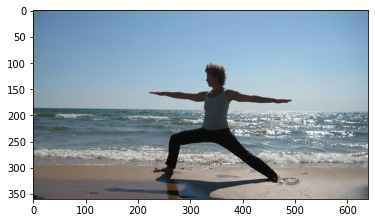

In [19]:
plt.imshow(image[:,:,::-1])

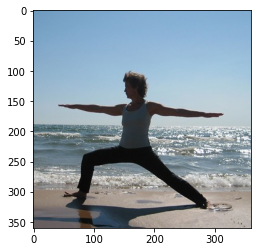

In [22]:
center_crop_val = image.shape[0] // 2
image_cropped = image[:image.shape[0], center_crop_val:image.shape[0] + center_crop_val, ::-1] # crop to avoid letterboxing step
plt.imshow(image_cropped)

In [23]:
img = cv2.resize(image_cropped, (256, 256))[np.newaxis, :, :, :]
img = (np.float32(img) - 0.0) / 255.0  # normalization (specified in tflite_converter_calculator, not in model card)

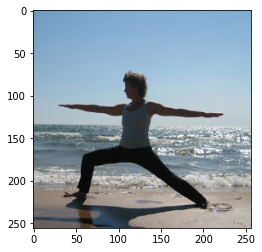

In [24]:
plt.imshow(img.squeeze())

In [25]:
interpreter.set_tensor(input_details[0]['index'], img)

interpreter.invoke()

output_face_landmarks = interpreter.get_tensor(output_details[0]['index'])[0]
output_face_flag = interpreter.get_tensor(output_details[1]['index'])[0]  # Most likely this is the face flag as written in model card

In [28]:
print(output_face_landmarks.shape)

(195,)


In [26]:
print(interpreter.get_tensor(selected_layer_dict['index']).shape)
print(interpreter.get_tensor(selected_layer_dict['index']))

(1, 64, 64, 39)
[[[[ -7.555979   -9.3282795  -9.388203  ...  -6.246625   -9.507126
    -10.949692 ]
   [ -6.9699936  -8.717389   -8.76143   ...  -6.259227   -9.212189
    -10.56422  ]
   [ -6.446227   -8.108745   -8.11309   ...  -6.6454716  -8.816536
    -10.211142 ]
   ...
   [-10.291525  -13.337969  -13.712929  ...  -6.770849   -6.893318
     -7.998226 ]
   [-11.214104  -14.357051  -14.743385  ...  -6.992737   -7.1520414
     -8.202741 ]
   [-11.753263  -15.039518  -15.430904  ...  -7.2618504  -7.486758
     -8.527591 ]]

  [[ -6.923937   -7.6735935  -7.750001  ...  -6.346589   -9.437256
    -10.203674 ]
   [ -5.385483   -5.6883173  -5.7611103 ...  -4.7186613  -7.552129
     -8.317809 ]
   [ -5.046425   -5.1537347  -5.192866  ...  -5.0819426  -7.17959
     -8.0206375]
   ...
   [ -8.628625   -9.934698  -10.36552   ...  -5.2235823  -5.366275
     -5.9665537]
   [ -9.480524  -10.842733  -11.273941  ...  -5.4430866  -5.5556974
     -6.093734 ]
   [-10.463357  -12.557062  -13.011109  ...

**I used 39 instead of 33 because (33, 5) is not reshaped to 195. Closest match is (39, 5) which worked.**

Model card,
https://drive.google.com/file/d/10WlcTvrQnR_R2TdTmKw0nkyRLqrwNkWU/preview

In [29]:
print(output_face_landmarks.squeeze()[0:9])
print(output_face_landmarks.squeeze().shape)

output_face_landmarks = tf.reshape(tensor=output_face_landmarks, shape=(39,5))
print(output_face_landmarks)
#print(output_face_landmarks[:, 0:1])


[110.05642   91.46971  -73.218376  11.424362  10.77923  112.147255
  87.61557  -73.16996   10.569757]
(195,)
tf.Tensor(
[[ 1.10056419e+02  9.14697113e+01 -7.32183762e+01  1.14243622e+01
   1.07792301e+01]
 [ 1.12147255e+02  8.76155701e+01 -7.31699600e+01  1.05697575e+01
   9.51182175e+00]
 [ 1.13488998e+02  8.71173553e+01 -7.31983032e+01  1.04346294e+01
   9.56789875e+00]
 [ 1.14856232e+02  8.66319275e+01 -7.32201004e+01  1.02789021e+01
   9.50329781e+00]
 [ 1.09119965e+02  8.89393005e+01 -6.48985214e+01  9.97141647e+00
   9.37924671e+00]
 [ 1.08420952e+02  8.93884354e+01 -6.49141464e+01  9.61456299e+00
   9.37443924e+00]
 [ 1.07594536e+02  8.98454971e+01 -6.48996582e+01  9.47424316e+00
   9.23537159e+00]
 [ 1.20308128e+02  8.80263443e+01 -6.03345261e+01  9.80117035e+00
   9.88329697e+00]
 [ 1.10097900e+02  9.20728073e+01 -2.14550762e+01  9.14647865e+00
   9.58720875e+00]
 [ 1.14772728e+02  9.47357254e+01 -6.84821243e+01  1.03396587e+01
   1.16908293e+01]
 [ 1.10913139e+02  9.63131332e

In [30]:
face_landmark_x = output_face_landmarks[:, 0:1]
face_landmark_y = output_face_landmarks[:, 1:2]
face_landmark_z = output_face_landmarks[:, 2:3]
face_landmark_v = output_face_landmarks[:, 3:4]
face_landmark_p = output_face_landmarks[:, 4:5]

print(face_landmark_x)

tf.Tensor(
[[110.05642 ]
 [112.147255]
 [113.489   ]
 [114.85623 ]
 [109.119965]
 [108.42095 ]
 [107.594536]
 [120.30813 ]
 [110.0979  ]
 [114.77273 ]
 [110.91314 ]
 [139.34059 ]
 [106.43837 ]
 [174.35081 ]
 [ 77.09518 ]
 [201.47292 ]
 [ 49.200035]
 [210.73007 ]
 [ 40.844986]
 [208.69742 ]
 [ 40.86767 ]
 [204.98012 ]
 [ 44.24171 ]
 [128.79933 ]
 [107.36645 ]
 [161.19788 ]
 [ 68.54108 ]
 [199.7656  ]
 [ 56.357597]
 [203.21817 ]
 [ 60.481174]
 [211.08823 ]
 [ 36.516666]
 [118.1103  ]
 [126.553314]
 [209.24771 ]
 [201.44704 ]
 [ 41.037575]
 [ 49.245094]], shape=(39, 1), dtype=float32)


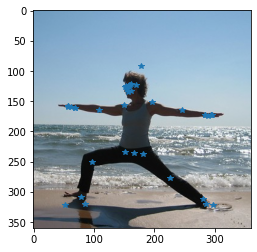

In [31]:
plt.imshow(image_cropped)
plt.plot(face_landmark_x/256.0*image_cropped.shape[0], (face_landmark_y/256.0)*image_cropped.shape[1], '*')

# Another example

In [33]:
!wget https://mrprepor.com/wp-content/uploads/2018/06/Damian-Estambul.jpg -O pose2.jpg

--2022-01-22 22:16:26--  https://mrprepor.com/wp-content/uploads/2018/06/Damian-Estambul.jpg
Resolving mrprepor.com (mrprepor.com)... 160.153.129.219
Connecting to mrprepor.com (mrprepor.com)|160.153.129.219|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 67037 (65K) [image/jpeg]
Saving to: ‘pose2.jpg’

pose2.jpg           100%[===================>]  65.47K  --.-KB/s    in 0.1s    

2022-01-22 22:16:26 (676 KB/s) - ‘pose2.jpg’ saved [67037/67037]



In [34]:
image = cv2.imread('pose2.jpg')

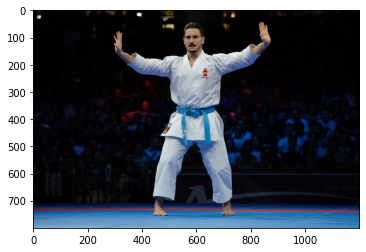

In [35]:
plt.imshow(image[:,:,::-1])

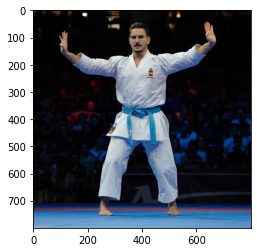

In [40]:
center_crop_val = image.shape[0] // 4
image_cropped = image[:image.shape[0], center_crop_val:image.shape[0] + center_crop_val, ::-1] # crop to avoid letterboxing step
plt.imshow(image_cropped)

In [41]:
img = cv2.resize(image_cropped, (256, 256))[np.newaxis, :, :, :]
img = (np.float32(img) - 0.0) / 255.0  # normalization (specified in tflite_converter_calculator, not in model card)

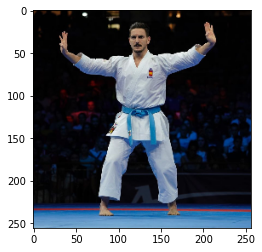

In [42]:
plt.imshow(img.squeeze())

In [43]:
interpreter.set_tensor(input_details[0]['index'], img)

interpreter.invoke()

output_face_landmarks = interpreter.get_tensor(output_details[0]['index'])[0]
output_face_flag = interpreter.get_tensor(output_details[1]['index'])[0]  # Most likely this is the face flag as written in model card

In [44]:
print(output_face_landmarks.shape)

(195,)


In [45]:
print(interpreter.get_tensor(selected_layer_dict['index']).shape)
print(interpreter.get_tensor(selected_layer_dict['index']))

(1, 64, 64, 39)
[[[[-12.754345  -12.869542  -12.491544  ... -12.304287  -11.040775
    -13.711243 ]
   [-11.529881  -11.616312  -11.329506  ... -11.591179  -10.425632
    -12.744822 ]
   [-10.209559  -10.592873  -10.425128  ... -11.139221  -10.154812
    -11.783081 ]
   ...
   [-10.152458  -11.468797  -11.470854  ... -12.520287  -10.623665
    -13.429102 ]
   [-10.671229  -12.555152  -12.52767   ... -13.256601  -10.387482
    -13.835186 ]
   [-11.038901  -13.051259  -12.997383  ... -13.821196  -10.408844
    -14.338774 ]]

  [[-12.004326  -10.759448  -10.38708   ... -12.338139  -10.981546
    -12.819397 ]
   [ -9.832051   -8.494305   -8.203611  ... -10.208891   -9.180248
    -10.642057 ]
   [ -8.481529   -7.1390743  -6.9282904 ...  -9.578724   -8.763245
     -9.732229 ]
   ...
   [ -8.407745   -8.130846   -8.172602  ... -10.617397   -9.043461
    -11.178062 ]
   [ -8.972016   -9.030338   -9.042779  ... -11.358383   -8.87463
    -11.536648 ]
   [ -9.791705  -10.218397  -10.207826  ... -

In [46]:
print(output_face_landmarks.squeeze()[0:9])
print(output_face_landmarks.squeeze().shape)

output_face_landmarks = tf.reshape(tensor=output_face_landmarks, shape=(39,5))
print(output_face_landmarks)
#print(output_face_landmarks[:, 0:1])




[ 124.25195    36.6896   -151.17947    12.884195   11.752609  126.57782
   32.35077  -143.81561    12.16209 ]
(195,)
tf.Tensor(
[[ 1.24251953e+02  3.66896019e+01 -1.51179474e+02  1.28841953e+01
   1.17526093e+01]
 [ 1.26577820e+02  3.23507690e+01 -1.43815613e+02  1.21620903e+01
   1.06327724e+01]
 [ 1.28442627e+02  3.23459015e+01 -1.43812973e+02  1.18947372e+01
   1.05845766e+01]
 [ 1.30338547e+02  3.23175888e+01 -1.43845703e+02  1.15474224e+01
   1.03885632e+01]
 [ 1.21169075e+02  3.25300903e+01 -1.43483566e+02  1.23585815e+01
   1.05952797e+01]
 [ 1.19315796e+02  3.26569061e+01 -1.43545944e+02  1.21173019e+01
   1.05415211e+01]
 [ 1.17372002e+02  3.27846184e+01 -1.43526489e+02  1.18650494e+01
   1.03015566e+01]
 [ 1.32859055e+02  3.54024124e+01 -8.77200089e+01  1.18182602e+01
   1.07371702e+01]
 [ 1.14422089e+02  3.60484505e+01 -8.66869507e+01  1.24478130e+01
   1.05402374e+01]
 [ 1.27722374e+02  4.24884491e+01 -1.29278351e+02  1.23936367e+01
   1.21728535e+01]
 [ 1.20872345e+02  4.2

In [47]:
face_landmark_x = output_face_landmarks[:, 0:1]
face_landmark_y = output_face_landmarks[:, 1:2]
face_landmark_z = output_face_landmarks[:, 2:3]
face_landmark_v = output_face_landmarks[:, 3:4]
face_landmark_p = output_face_landmarks[:, 4:5]

print(face_landmark_x)

tf.Tensor(
[[124.25195 ]
 [126.57782 ]
 [128.44263 ]
 [130.33855 ]
 [121.169075]
 [119.315796]
 [117.372   ]
 [132.85905 ]
 [114.42209 ]
 [127.722374]
 [120.872345]
 [149.56471 ]
 [100.17944 ]
 [182.73566 ]
 [ 70.76992 ]
 [203.94675 ]
 [ 42.194202]
 [210.3776  ]
 [ 33.74499 ]
 [209.87811 ]
 [ 32.732735]
 [206.8112  ]
 [ 36.75828 ]
 [142.69519 ]
 [112.4386  ]
 [156.76813 ]
 [ 93.132324]
 [162.47049 ]
 [ 90.45393 ]
 [160.23126 ]
 [ 94.19599 ]
 [169.5011  ]
 [ 81.990875]
 [127.579956]
 [122.84913 ]
 [209.87796 ]
 [204.      ]
 [ 33.183716]
 [ 42.12643 ]], shape=(39, 1), dtype=float32)


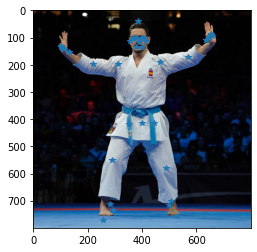

In [48]:
plt.imshow(image_cropped)
plt.plot(face_landmark_x/256.0*image_cropped.shape[0], (face_landmark_y/256.0)*image_cropped.shape[1], '*')